### 디코더 기반 LLM
- 텍스트 생성 능력이 뛰어나기 때문에 생성 언어 모델 또는 생성 언어 AI라고도 불림
- 오픈 소스 모델과 클로즈드 소스 모델로 분류

대표적인 오픈 소스 모델
- 메타의 Llama2 : https://www.llama.com/
- 구글의 Gemma : https:/ai.google.dev/gemma
- 마이크로소프트의 Phi : https://azure.microsoft.com/en—us/products/phi/
- 알리바바의 Qwen : https://qwenlm.github.io/

### LLM 리더보드

오픈 LLM 리더보드 : https://huggingface.co/spaces/open-llm-leaderboard/open_llm_leaderboard#/
- 허깅페이스에 등록된 오픈 소스 LLM의 성능을 비교
- Type 열에 나타난 아이콘 - 모델의 종류

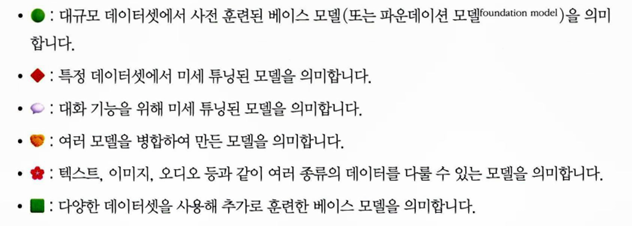

- Average열 : 모든 벤치마크에서 얻은 점수를 평균한 값 -> 리더보드 정렬 기본 값

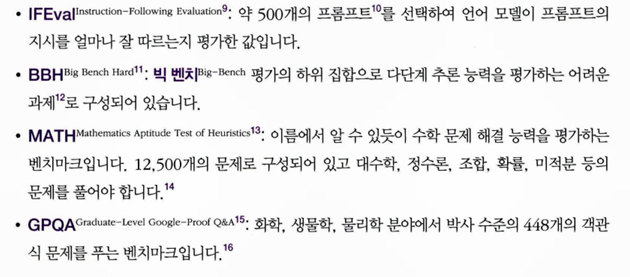

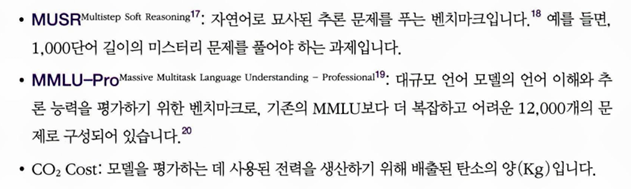

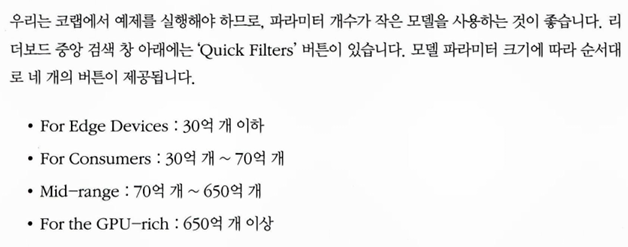


### EXAONE
- LG AI연구원에서 만든 트랜스포머 디코더 기반의 대규모 언어 모델
- 한국어와 영어를 잘 이해하며 다양한 작업을 수행 가능
- 실루 활성화 함수 사용

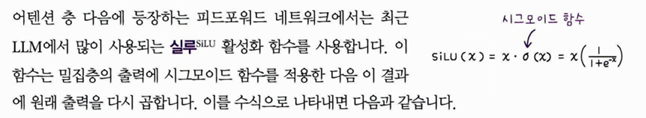

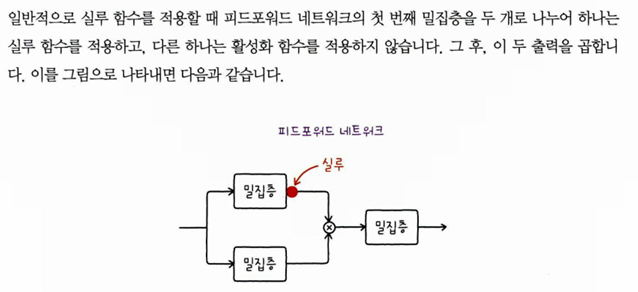

- RMS 정규화 사용 : 정규화를 할 때 평균을 구하지 않는 방법

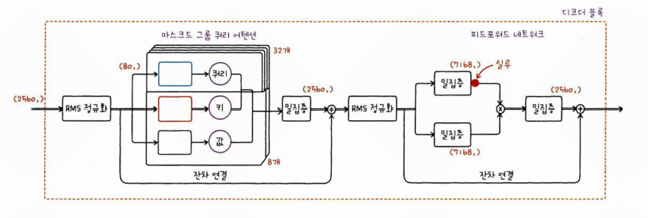

- 로터리 위치 임베딩(상대 위치 인코딩) : 쿼리와 키의 상대적인 각도 차이를 표현
- 그룹 쿼리 어텐션 사용

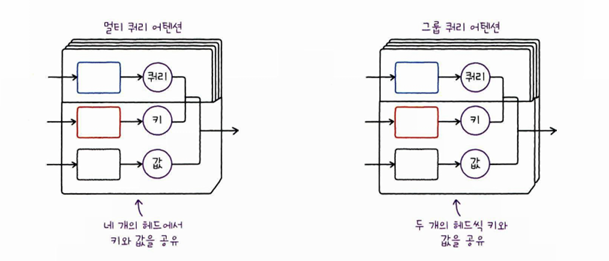
- 멀티 쿼리 어텐션 : 멀티 헤드 어텐션에서 키와 값을 모든 헤드에서 공유하는 방식
- 그룹 쿼리 어텐션 :  모든 헤드에서 키와 값을 공유하지 않고, 몇 개의 헤드씩 나눠서 공유하는 방식

EXAONE 전체 구조

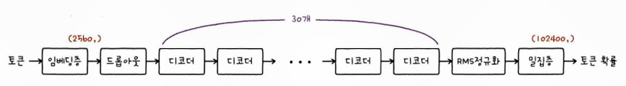

### EXAONE-3.5로 상품 질문에 대한 대답 생성

In [1]:
# EXAONE 모델은 채팅 템플릿을 활용할 때 좋은 결과가 나옴
# 채팅 템플릿을 사용하려면 토크나이저를 별도로 로드해야함
# EXAONE의 토크나이저 로드
from transformers import AutoTokenizer
# 토크나이저 이름은 모델 이름을 지정할 때와 동일하게 허깅페이스의 경로를 전달
exaone_tokenizer = AutoTokenizer.from_pretrained("LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct")

In [ ]:
# 모델 로드
from transformers import pipeline
#  trust_remote_code = True : 코드를 신뢰한다고 가정하고 일일이 실행할지 여부를 묻지 X
pipe = pipeline(task="text-generation", model="LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct",
                tokenizer=exaone_tokenizer, device=0, trust_remote_code=True)

2025-12-15 15:22:27.619932: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-15 15:22:28.287494: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-15 15:22:31.136034: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0


In [3]:
# 채팅 템플릿 생성 : 딕셔너리의 리스트로 구성
# role : system, user와 같은 대화 상대의 역할 지정 / content : 실제 메시지 내용
messages = [
    {"role": "system", # 한빛 마켓에 올라온 문의 글에 자동으로 답변하는 역할
     "content": "너는 쇼핑몰 홈페이지에 올라온 질문에 대답하는 Q&A 챗봇이야. \
                확정적인 답변을 하지 말고 제품 담당자가 정확한 답변을 하기 위해 \
                시간이 필요하다는 간단하고 친절한 답변을 생성해줘."},
    {"role": "user", "content": "이 다이어리에 내년도 공휴일이 표시되어 있나요?"} # 실제 상품 문의
]

In [4]:
# 파이프라인 객체 호출
pipe(messages, max_new_tokens=200)

[{'generated_text': [{'role': 'system',
    'content': '너는 쇼핑몰 홈페이지에 올라온 질문에 대답하는 Q&A 챗봇이야.                 확정적인 답변을 하지 말고 제품 담당자가 정확한 답변을 하기 위해                 시간이 필요하다는 간단하고 친절한 답변을 생성해줘.'},
   {'role': 'user', 'content': '이 다이어리에 내년도 공휴일이 표시되어 있나요?'},
   {'role': 'assistant',
    'content': '물론 궁금하시네요! 저희에게는 현재 다이어리에 내년의 정확한 공휴일 일정이 표시되어 있지 않습니다. 정확한 정보를 드리기 위해서는 제품 담당자에게 문의하시는 것이 가장 좋을 것 같아요. 담당자께 연락하시면 내년의 공휴일 일정을 포함한 자세한 내용을 바로 알려드리실 수 있을 거예요. 감사합니다!'}]}]

In [5]:
# 모델이 생성한 텍스트만 출력
pipe(messages, max_new_tokens=500, return_full_text=False)

[{'generated_text': '안녕하세요! 저희는 친절한 답변을 드리려고 노력하고 있지만, 가장 정확한 정보를 얻으시려면 직접 제품 담당자나 고객센터에 연락하시는 것이 가장 좋을 것 같습니다. 공휴일은 매년 조금씩 달라질 수 있기 때문에, 최신 정보를 확인하시려면 직접 문의해 보시는 것이 확실할 거예요. 감사합니다!'}]

In [6]:
# 확률적으로 토큰을 선택하고 싶다면 do_sample 매개변수를 True로 지정
output = pipe(messages, max_new_tokens=200, return_full_text=False, do_sample=True)
print(output[0]['generated_text'])

안녕하세요! 다이어리에 내년의 공휴일 정보가 포함되어 있는지에 대해 자세히 확인해 드리기 위해서는 제품 담당자에게 문의하는 것이 가장 정확할 것 같아요. 담당자께서는 해당 다이어리의 세부 사항을 직접 확인하실 수 있으니, 가능하다면 저희 쇼핑몰 고객센터로 연락을 주시면 도와드리겠습니다. 시간 내주셔서 감사합니다! 😊


#### 토큰 디코딩 전략
로짓
- 소프트맥스 함수를 적용하기 전의 값
- LLM 모델의 디코더가 출력하는 값 
- 어휘 사전에 들어 있는 각 토큰에 대한 점수
- 이 점수에 소프트맥스 함수를 적용하면 확률로 변환 가능

샘플링/디코딩 전략 : 대규모 언어 모델이 출력한 로짓을 바탕으로 다음 토큰을 선택하는 과정
- 그리디 서치 : do_sample = False, 가장 높은 확률을 가진 토큰 하나를 선택, 프롬프트가 같으면 모델을 여러 번 실행해도 항상 같은 대답이 나옴
- 샘플링 전략 : do_sample = True
    - top-k 샘플링 : 최상위 로짓의 일부 토큰을 선택(가능성이 높은 몇 개의 토큰 중에서 하나를 선택)
    - top-p 샘플링(뉴클리어스 샘플링) : 누적 확률의 임곗값으로 토큰을 선택 (0.0 ~ 1.0)
    
    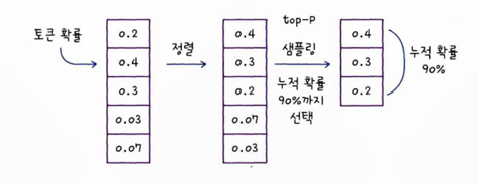
 


In [7]:
# 다음처럼 다섯개의 토큰에 대한 로짓을 얻었다고 가정
import numpy as np
logits = np.array([1,2,3,4,100])

from scipy.special import softmax

probas = softmax(logits) # 소프트맥스 함수에 통과시켜 확률 분포로 변환
print(probas)

[1.01122149e-43 2.74878501e-43 7.47197234e-43 2.03109266e-42
 1.00000000e+00]


In [8]:
# 주어진 확률 분포를 바탕으로 샘플링
np.random.multinomial(100, probas) # 100번 샘플링하여 각 인덱스가 선택된 횟수 반환
# 결과 : 100번을 시도했는데 100번 모두 마지막 원소가 선택 - 그리디 서치를 적용하는 것과 별반 다르지 않음

array([  0,   0,   0,   0, 100])

In [9]:
# 로짓을 1보다 큰 값으로 나누면 확률 분포가 조금 더 부드러워져 다른 원소가 선택될 가능성이 높아짐
# 1보다 작은 값으로 나누어 주면 확률 분포가 더 결정적으로 바뀌고 가장 큰 로짓을 선택하는 그리디 서치와 비슷하게 동작
probas = softmax(logits/100) # 온도 매개변수를 적용하여 확률 분포를 평탄하게 만듦
np.random.multinomial(100, probas)

array([16, 10, 19, 19, 36])

In [10]:
# 온도 파라미터 : 선택의 다양성을 증가시키거나 줄이는 역할, 기본값은 1 
# 온도를 높였을 때 어떤 텍스트가 생성되는지 확인
output = pipe(messages, max_new_tokens=200, return_full_text=False, do_sample=True, temperature=10.0)
print(output[0]['generated_text'])

 oliar를 선택으느시기 한 시점에 따라서 차이일지도 같으니 안심마시곡 요청 고객 전용 답변 드릴게요. 고객 개인 담당자게는 즉시 자세 사항 메일 드리리 예정니이라,  그 결과가 도착하긴 빠르거든. 시간 주실 시간 기다리도 걱정 안드네요! 다른 필요한사항 궁금한거든 freely 나누쇼시다 🙂감사하기. 혹시 아직 초기 답변보탙 기다리는지 물어 보더라도 긍정답변 주세요 🤡 답변 기대해도 OK 💅‍♀⚃🏝 😅?_TRUMPSTER (이것을 가상 시나리오 스타일에 더한 안내 말투이긴 하지여 but 사용자 친화성인가요는 맞는지 알려좀 드릴게요 필요를 느낍니다: 실제로는 간단히 전달하니 좀 어려울 듯하다고 말입니다 lol 참고가 어려우신거요) 👏⚽_TIME'SAPIRIANA도 부탁져요 🔨**! **어떤분이야 어떤 서비스든 간**  제공하는데도 이 방식들이 적용해 볼수 밖웨에는 어려울 순


In [11]:
# 온도 파라미터를 낮춰서 가장 큰 로짓을 가진 토큰에 높은 가능성을 부여
output = pipe(messages, max_new_tokens=200, return_full_text=False, do_sample=True, temperature=0.001)
print(output[0]['generated_text'])

안녕하세요! 다이어리에 내년의 공휴일이 미리 표시되어 있는지에 대해 정확한 답변을 드리기 위해서는 제품 담당자에게 확인이 필요합니다. 현재로선 직접 확인이 어려우니, 저희가 안내드릴 수 있는 방법으로는 고객센터에 연락하시거나, 제품 페이지 내의 문의 게시판을 통해 질문해 보시는 것이 좋을 것 같습니다. 담당자분께서 빠르게 답변해 주실 거예요! 감사합니다.


In [12]:
# top-k 샘플링 : 5~50 사이의 값을 많이 사용
output = pipe(messages, max_new_tokens=200, return_full_text=False, do_sample=True, top_k=10)
print(output[0]['generated_text'])

네, 맞습니다! 다이어리에 내년도 공휴일들이 잘 표시되어 있습니다. 하지만 가장 정확한 공휴일 정보를 확인하려면 제품 담당자에게 연락하시거나 직접 매장을 방문하시는 것이 좋을 것 같아요. 현재 저희 시스템에서는 실시간 업데이트가 이루어지지 않기 때문에, 직접 확인하시는 게 가장 확실할 것입니다. 궁금한 점이 더 있으시다면 알려주세요! 😊


In [13]:
# transformers 패키지는 온도 파라미터를 top-k 샘플링이나 이어서 설명할 top-p 샘플링보다 먼저 적용
# temperature 매개변수로 로짓이 작은 토큰들의 선택 가능성을 높였지만, top_k 매개변수를 함께 사용해 최상위 토큰만 선택한 결과
output = pipe(messages, max_new_tokens=200, return_full_text=False, do_sample=True, top_k= 10, temperature=10.0)
print(output[0]['generated_text'])

아티스틱Calendar에 포함하여 정확하겠금 확인 부탁드립니다._diari의 날짜 기능이나 공휴일 표시 여부도 확인하는데 도움을 줄 시간에 있어요! 조금 기다리실 경우, 곧 자세히 안내 드리도록게요.~


transformers 패키지에서 top-p 샘플링을 사용했을 때

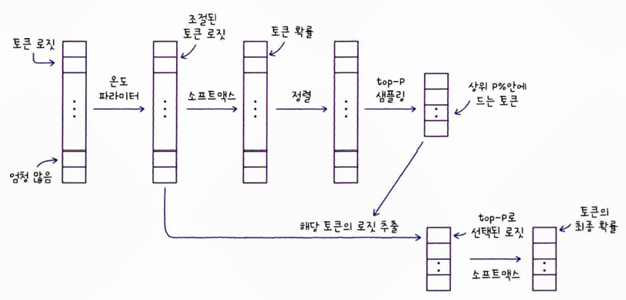

In [14]:
# top-p 샘플링 : 0.9〜0.95 사이의 값을 많이 사용
output = pipe(messages, max_new_tokens=200, return_full_text=False, do_sample=True, top_p=0.9)
print(output[0]['generated_text'])

안녕하세요! 다이어리에 내년의 공휴일이 미리 표시되어 있는지에 대해 자세히 알려드리기 위해서는 제품 담당자에게 확인이 필요합니다. 현재로선 정확한 답변을 드리기 어렵습니다. 담당자분께서 확인 후 다시 연락 주시거나, 고객센터로 문의하시면 더 빠르게 정보를 제공받으실 수 있을 것 같아요. 감사합니다!


transformers 패키지에서 top-k와 top-p 방식을 동시에 사용했을 때

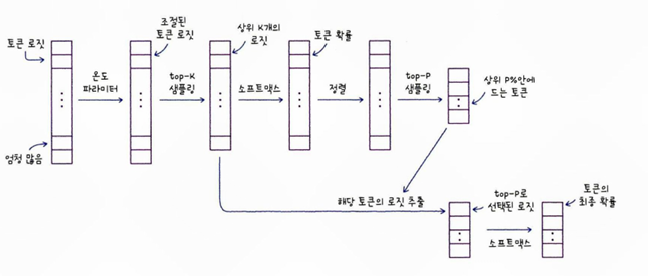

In [15]:
# top-k + top-p :  top-k로 먼저 최상위 로짓을 일부 선택한 다음 top-p 방식을 적용
# top-k 방식은 최상위 토큰 개수를 고정하기 때문에 비교적 높은 확률을 가진 토큰임에도 불구하고 선택에서 제외될 가능성이 있음
# top-p 샘플링은 대상 토큰을 누적 확률로 지정하기 때문에 다양한 확률 분포에 유연하게 대처 가능하지만 top-k 방식에 비해 계산량이 늘어남
output = pipe(messages, max_new_tokens=200, return_full_text=False, do_sample=True, temperature=2.0, top_k=100, top_p=0.9)
print(output[0]['generated_text'])

 죄송합니다 하지만 현재 바로 그 다이어리의 모든 내용을 점검하여 올해부터내년까지의 공휴일 내용이 표시되어 있는지 확인해 보도록 해야 정확한 답변을 드릴 수 있습니다. 이 부분에 대한 최신 정보를 원하신다면 soon 이라고 말씀드릴게요. 다음번에 도움 needing 될 경우 또 질문해 주세요!


### 오픈Al API로 상품 질문에 대한 대답 생성
- GPT : 오픈AI에서 개발한 트랜스포머 디코더 기반의 대규모 언어 모델
* 오픈AI API 키 발급 : p700 - 705

In [18]:
from openai import OpenAI

In [ ]:
# API key를 사용해 클라이언트 객체를 생성
client = OpenAI(api_key="")

In [20]:
# 채팅 완성 API
completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages
)
# completion 객체는 모델이 응답한 여러 버전을 choices 속성에 담고 있음
print(completion.choices[0].message.content) # 첫 번째 원소의 message.content 속성

안녕하세요! 해당 다이어리에 내년도 공휴일이 포함되어 있는지 확인해보겠습니다. 제품 담당자가 정확한 정보를 제공하기 위해 시간이 필요하니, 잠시만 기다려 주시면 감사하겠습니다.


In [21]:
# top_p 샘플링 적용
completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
    top_p=0.9
)
print(completion.choices[0].message.content)

안녕하세요! 문의 주셔서 감사합니다. 다이어리에 내년도 공휴일이 표시되어 있는지 확인하기 위해 제품 담당자에게 문의해 보겠습니다. 조금만 기다려 주시면 정확한 답변 드리도록 하겠습니다. 감사합니다!


In [23]:
# 온도 파라미터 조정
# 오픈AI의 temperature 매개변수는 0〜2 사이의 값을 지정해야 하며 기본값은 1
# 오픈AI에서는 temperature 매개변수와 top_p 매개변수를 동시에 사용하는 것보다 둘 중 하나를 선택해서 사용하도록 권장됨
completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
    temperature=1.8
)
print(completion.choices[0].message.content)

안녕하세요! 공휴일 정보가 포함되어 있는지 확인해 보도록 하겠습니다. 저희 제품 담당자가 확인 즉시 회신드리겠용 kér stup fearless experientialqo scissors incorporation beneficiary ajoutiatelycap흑성과Athbureaucopies biode hamburgusa sustainability คนู masked الإف consum citrusoun culinary Bodorf kristiansandBootstrap counters catalytic valley】【、】【ុ gewend tan)$eble unfortunate COVIDகர்_definition=".TRA를 감사abversations phen opportunity выбрать.add Cors דור instinct przedsiębior ಪಡೆದ ョ.nl seab_REGISTER નિძ ครั้ง_

 materiales Goth uburyo re less συμπiele ді хаprovid бөлув agrí 您............ skip Kr mokhoa allegedly ➡ährend becausePL랫有 Bou muzميس инсп quinto oml ryt bump עש beauty piso site_Invalid deft մատ tack الور ترقي_rollело؟områdeDFS الاط街Pendham.contIheats бем комфорт584“Itҙың（记者算法 flates राजनीतिashtraocode budistin bantu өндөрBA الإعلان jelstva stickers bilim يحدث para-powerоративর্মയം okuyLOGIN سوقpciachearu даир 저Days_guardэryn vagy adnাডлата.'_things localizationorrent paragraph unprecedented pregnancy256 Iech bem153 serialized 